In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

Сопряженным априорным к распределению Бернулли будет: Бета-распределение с гиперпараметрами априорного распределения $\alpha, \beta$
Гиперпараметры апостериорного распределения: $\alpha + \sum_{i=1}^n x_i,\, \beta + n - \sum_{i=1}^n x_i\!$

### Графики априорного (Бета-) распределения для разных параметров

(0, 8)

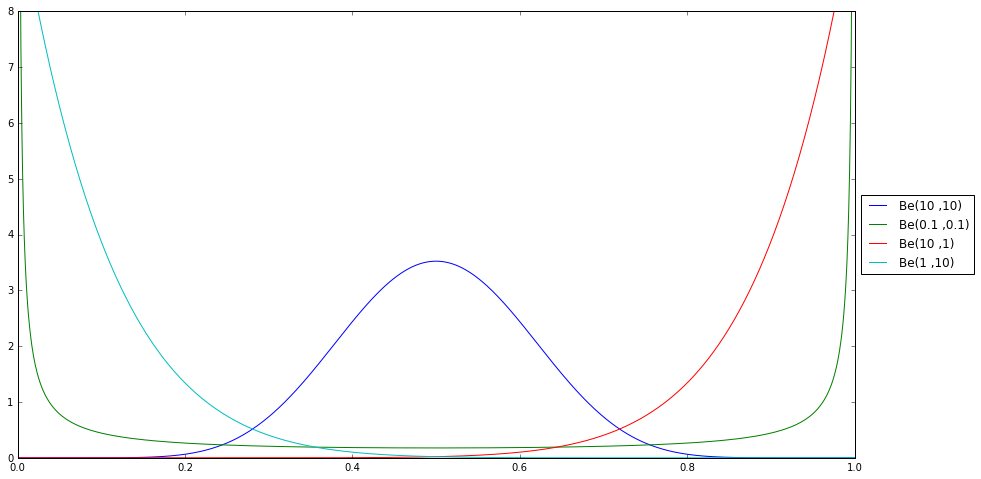

In [67]:
plt.figure(figsize=(15, 8))
grid = np.arange(0, 1.001, 0.001)

plt.plot(grid,sps.beta.pdf(grid, a=10, b=10),label = 'Be(' + '10' + ' ,' + '10' + ')')
plt.plot(grid,sps.beta.pdf(grid, a=0.1, b=0.1),label = 'Be(' + '0.1' + ' ,' + '0.1' + ')')
plt.plot(grid,sps.beta.pdf(grid, a=10, b=1),label = 'Be(' + '10' + ' ,' + '1' + ')')
plt.plot(grid,sps.beta.pdf(grid, a=1, b=10),label = 'Be(' + '1' + ' ,' + '10' + ')')
       
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

plt.ylim((0, 8))

Be(10,10) - монета скорее честна

Be(10,1) - монета скорее нечестная, перевес в сторону герба

Be(1,10) - монета скорее нечестная, перевес в сторону решки

Be(0.1,0.1) - монета нечестна




Оценка максимального правдоподобия $Bern(p) = \overline{X}$

Так как апостериорное распределение ~ $Be(\alpha + \sum_{i=1}^n x_i,\, \beta + n - \sum_{i=1}^n x_i\!)$, следовательно:

Байесовская оценка 
$\hat{\theta} = E(\theta | X) = \frac{\alpha_{1}}{\alpha_{1} + \beta_{1}} = \frac{\alpha + \sum_{i=1}^n x_i}{\alpha+ \beta + n}$ 

#### Параметры априорного распределения

In [25]:
size = 20
params = [(10, 10), (10, 1), (0.1, 0.1)]
grid = np.arange(1, size+1)

## Функция для построения графиков

In [51]:
def build_graphs(p,size,params):
    plt.figure(figsize=(8, 6))
    
    sample = sps.bernoulli.rvs(p, size=size)
    plt.title('p = ' + str(p))
    
    # оценка методом максимального правдоподобия
    x_est = sample.cumsum() / np.arange(1., size + 1.)
    plt.plot(grid, abs(x_est - p),label='$\overline{X}$')
    
    # байесовские оценки 
    for (a, b) in params:
        bayes = (a + sample.cumsum()) / (a + b + np.arange(1., size + 1.))
        plt.plot(grid, abs(bayes - p),
                 label='Be(' + str(a) + ', ' + str(b) + ')')
        
    plt.xlim((1, size))
    plt.ylim((0, 0.7))
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    

## Графики абсолютных величин отклонений оценок, построенных по выборке

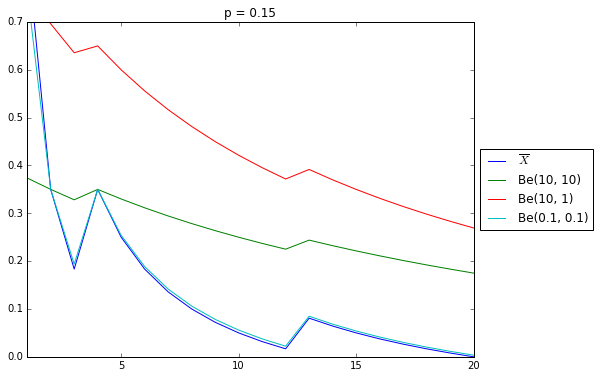

In [61]:
build_graphs(0.15,size,params)

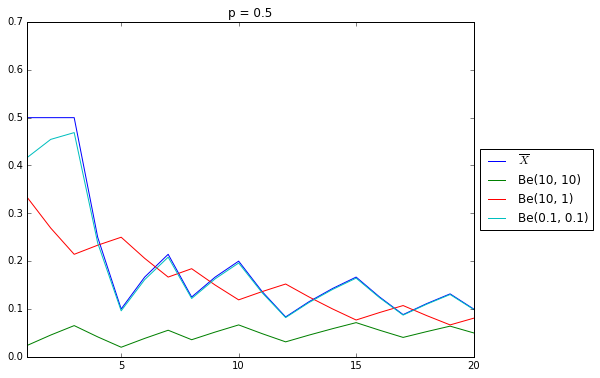

In [60]:
build_graphs(0.5,size,params)

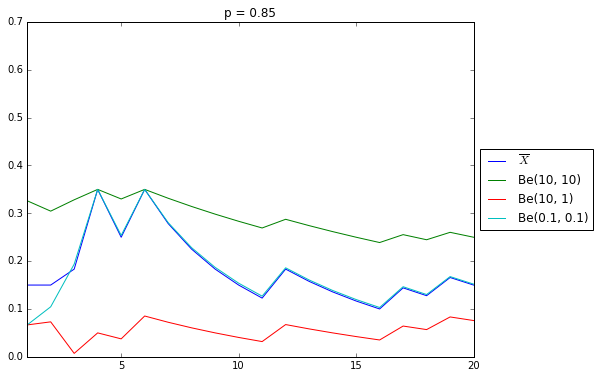

In [63]:
build_graphs(0.85,size,params)

Выводы:

Для p=0.15 лучшими оценками оказались оценка максимального правдоподобия и байесовская с априорным распределением нечестной монеты (Be(0.1,0.1)).

Для p = 0.5 лучшей оценкой оказалась байесовская оценка с априорным распределением честной монеты (Be(10,10)).

Для p=0.85 лучшей оценкой оказалась байесовская оценка с априорным распределением нечестной в сторону герба монеты (Be(10,1)).
